In [71]:
import pandas as pd

# Set options to show all columns
pd.set_option('display.max_columns', None)

# Upload csv file
data = r'C:\repos\immo-eliza-team6-analysis\analysis\PL_houses_incl_outliers.csv' # Fill your path to file
df = pd.read_csv(data, sep = ',')


df.dtypes


id                      int64
locality_name          object
Postal_code            object
Price                   int64
Subtype                object
Number_of_bedrooms      int64
Living_area             int64
street                 object
number                 object
latitude              float64
longitude             float64
Open_fire               int64
Swimming_Pool           int64
hasTerrace              int64
terraceSurface          int64
gardenSurface           int64
Kitchen_type           object
Number_of_facades       int64
State_of_building      object
Furnished               int64
epc                    object
landSurface           float64
price_per_sqm         float64
price_per_sqm_land    float64
dtype: object

In [72]:
# transform dtypes 'object' to 'category'
int_columns = df.select_dtypes(include=['object'])

for col in int_columns.columns:
    df[col] = df[col].astype('category')

df['Postal_code']= df['Postal_code'].astype('string')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5663 entries, 0 to 5662
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  5663 non-null   int64   
 1   locality_name       5663 non-null   category
 2   Postal_code         5663 non-null   string  
 3   Price               5663 non-null   int64   
 4   Subtype             5663 non-null   category
 5   Number_of_bedrooms  5663 non-null   int64   
 6   Living_area         5663 non-null   int64   
 7   street              5663 non-null   category
 8   number              5646 non-null   category
 9   latitude            5661 non-null   float64 
 10  longitude           5661 non-null   float64 
 11  Open_fire           5663 non-null   int64   
 12  Swimming_Pool       5663 non-null   int64   
 13  hasTerrace          5663 non-null   int64   
 14  terraceSurface      5663 non-null   int64   
 15  gardenSurface       5663 non-null   in

In [73]:
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use('ggplot')

df.corr(method='pearson', min_periods=1, numeric_only=True)

,id,Price,Number_of_bedrooms,Living_area,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Number_of_facades,Furnished,landSurface,price_per_sqm,price_per_sqm_land
id,1.000000,-0.029757,-0.053154,-0.058027,0.072423,-0.071420,-0.003147,-0.018283,0.014039,-0.011843,-0.016069,-0.060744,-0.007087,-0.022459,0.027079,0.008072
Price,-0.029757,1.000000,0.364752,0.503852,0.177717,-0.068427,0.115164,0.239088,0.083039,0.042853,0.141606,0.108460,0.033838,0.261459,0.725701,0.184026
Number_of_bedrooms,-0.053154,0.364752,1.000000,0.589535,-0.001222,-0.000498,0.074213,0.104099,0.033313,0.032131,0.086121,0.066223,0.013288,0.158469,0.031024,0.041340
Living_area,-0.058027,0.503852,0.589535,1.000000,0.040368,-0.026425,0.156508,0.169552,0.032668,0.033543,0.129247,0.106355,0.010454,0.258423,-0.055342,-0.034265
latitude,0.072423,0.177717,-0.001222,0.040368,1.000000,-0.537177,-0.035976,0.015316,-0.078736,-0.056537,-0.055433,-0.143500,-0.008982,-0.021984,0.215843,0.148879
longitude,-0.071420,-0.068427,-0.000498,-0.026425,-0.537177,1.000000,0.061016,0.018066,0.107517,0.072348,0.067148,0.242082,-0.015932,0.038501,-0.073771,-0.061786
Open_fire,-0.003147,0.115164,0.074213,0.156508,-0.035976,0.061016,1.000000,0.092778,0.056185,0.043619,0.104055,0.117638,0.008576,0.143322,0.017496,-0.044847
Swimming_Pool,-0.018283,0.239088,0.104099,0.169552,0.015316,0.018066,0.092778,1.000000,0.071176,0.031266,0.057537,0.092756,0.006238,0.140288,0.134653,-0.046708
hasTerrace,0.014039,0.083039,0.033313,0.032668,-0.078736,0.107517,0.056185,0.071176,1.000000,0.149049,0.040224,0.104422,0.045961,0.027089,0.078426,0.015446
terraceSurface,-0.011843,0.042853,0.032131,0.033543,-0.056537,0.072348,0.043619,0.031266,0.149049,1.000000,0.073319,0.038997,0.016038,0.025241,0.044746,-0.003643


In [74]:
# Remove lines where 'Living-area' is = 0
df = df[df['Living_area'] != 0]

df.shape


(5663, 24)

In [75]:
# Removing unnecessary columns
    #columns_to_drop = ['latitude', 'longitude', 'id', 'Type_of_sale', 'street', 'number']
    #df = df.drop(columns=columns_to_drop, errors='ignore')
df['price_per_sqm'] = df['Price'] / df['Living_area']
df['post_1'] = df['Postal_code'].str[0].astype('int')
df['post_2'] = df['Postal_code'].str[0:2]

df['price_per_sqm'].describe()


count     5663.000000
mean      2284.410909
std       1268.145054
min        186.935372
25%       1612.019701
50%       2108.433735
75%       2684.706874
max      29133.858268
Name: price_per_sqm, dtype: float64

In [76]:
df['Living_area'].sort_values



<bound method Series.sort_values of 0       125
1       167
2       154
3       172
4       350
       ... 
5658    260
5659    169
5660    237
5661    215
5662    255
Name: Living_area, Length: 5663, dtype: int64>

In [77]:
df['post_1'].describe

<bound method NDFrame.describe of 0       9
1       9
2       2
3       1
4       1
       ..
5658    4
5659    8
5660    1
5661    6
5662    8
Name: post_1, Length: 5663, dtype: int64>

In [78]:
print(df.columns)

Index(['id', 'locality_name', 'Postal_code', 'Price', 'Subtype',
       'Number_of_bedrooms', 'Living_area', 'street', 'number', 'latitude',
       'longitude', 'Open_fire', 'Swimming_Pool', 'hasTerrace',
       'terraceSurface', 'gardenSurface', 'Kitchen_type', 'Number_of_facades',
       'State_of_building', 'Furnished', 'epc', 'landSurface', 'price_per_sqm',
       'price_per_sqm_land', 'post_1', 'post_2'],
      dtype='object')


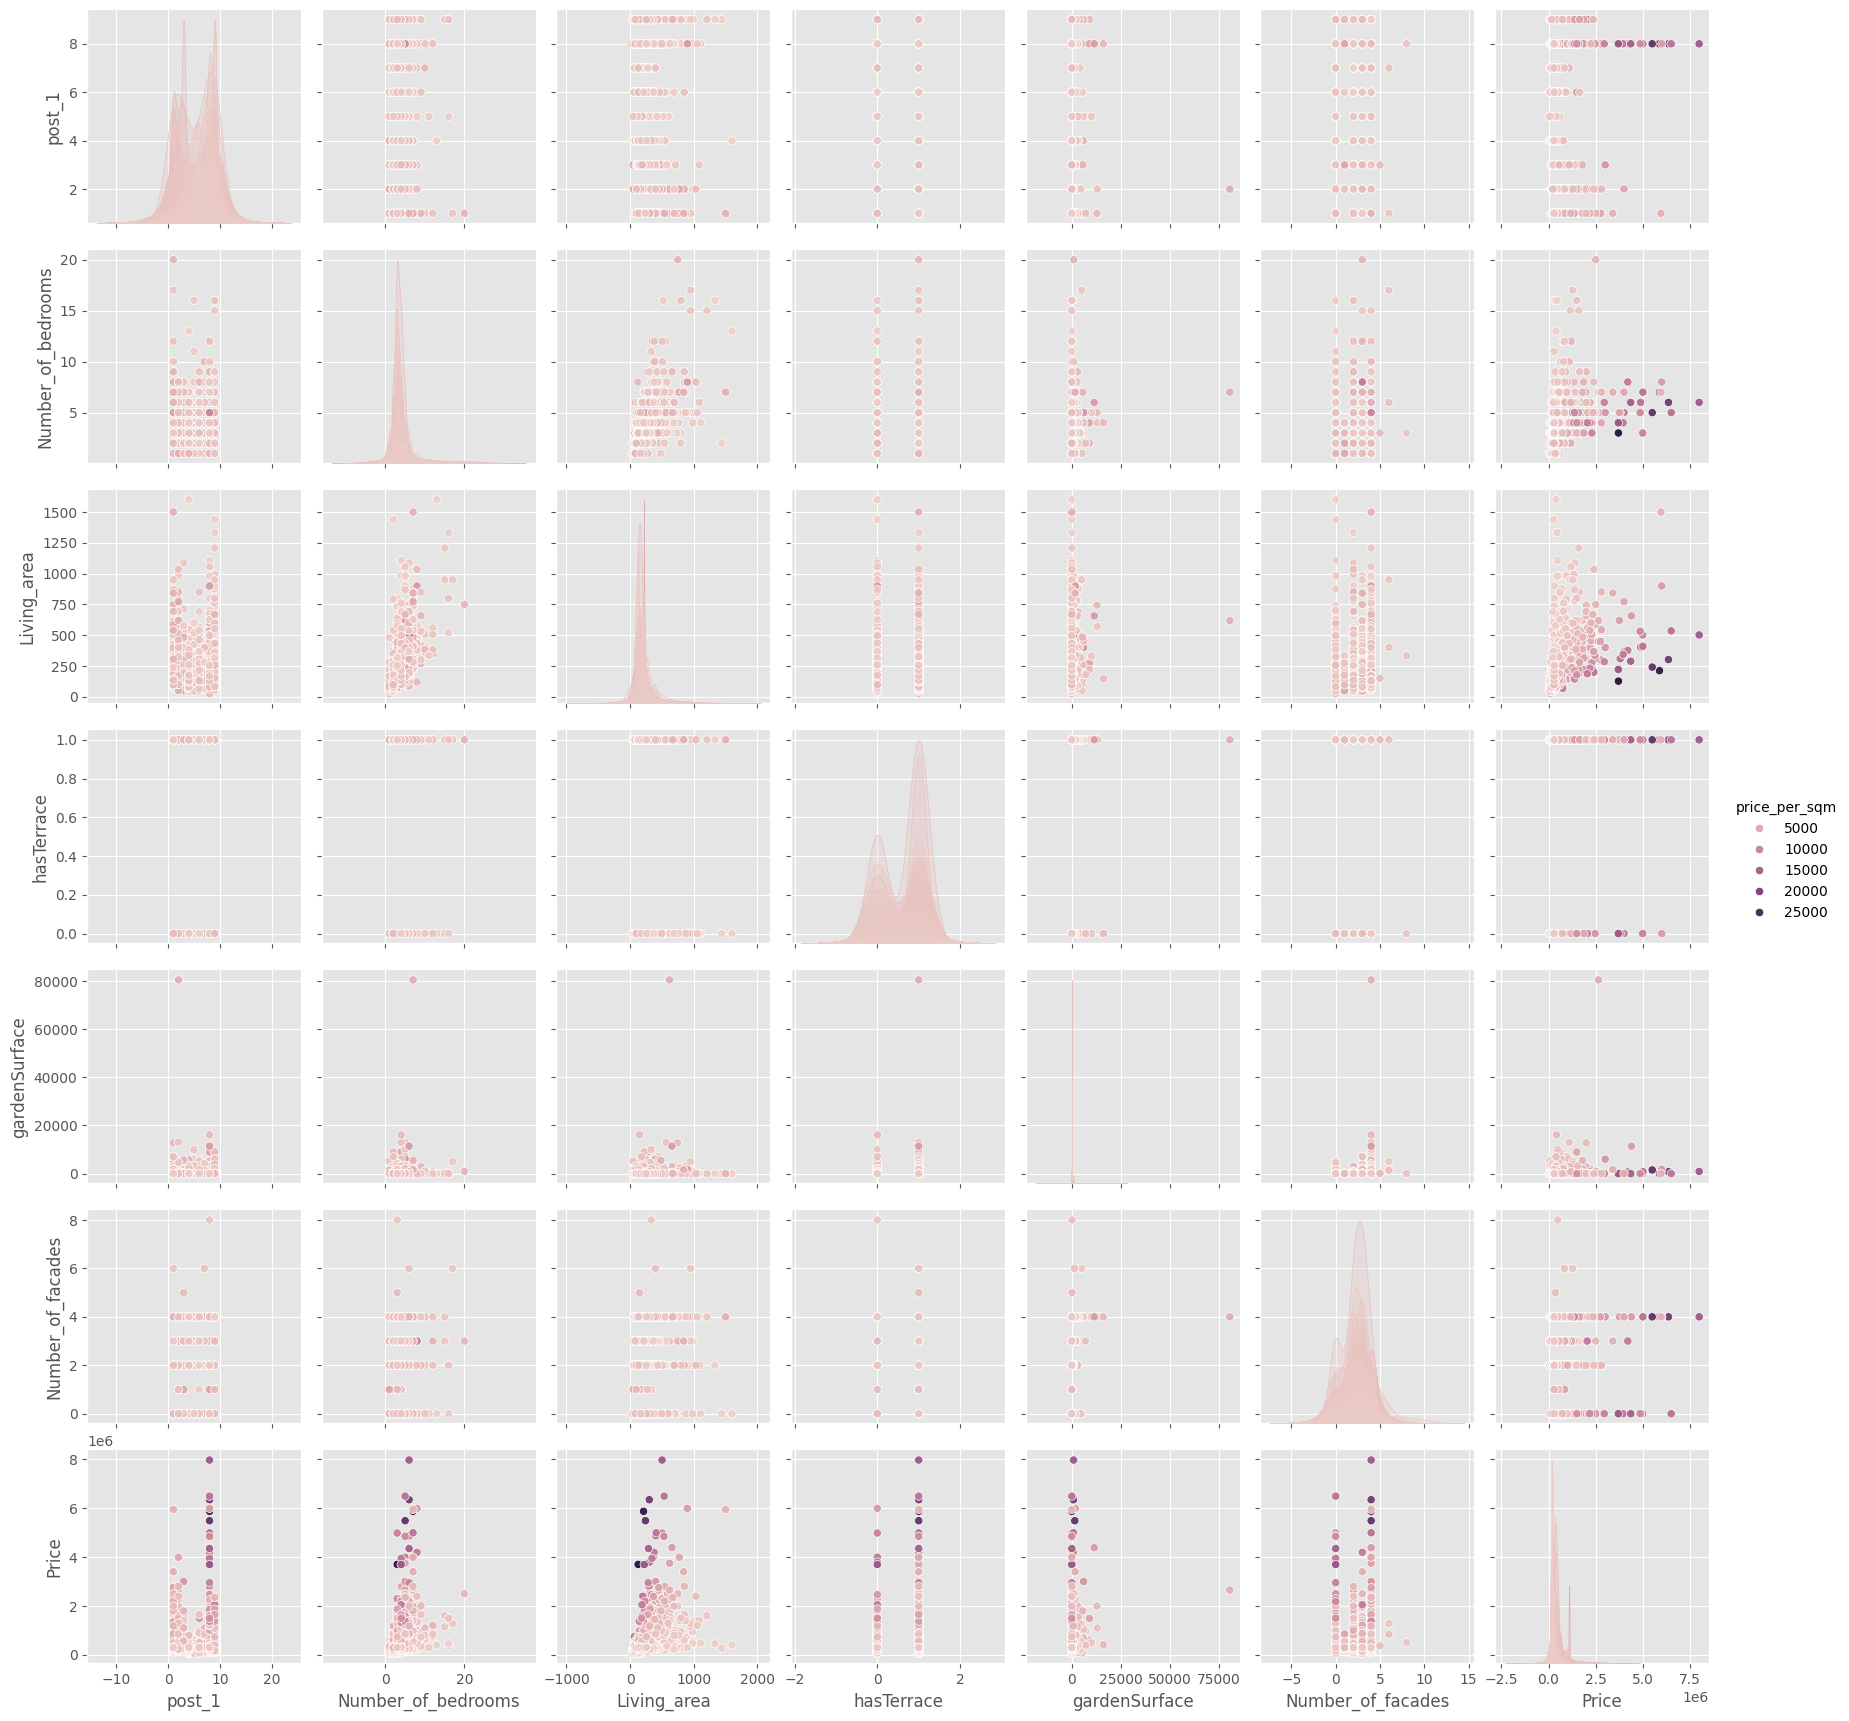

In [79]:


#cols_to_plot = ['Price', 'Subtype', 'Number_of_bedrooms', 'Living_area', 'Open_fire', 'Swimming_Pool', 'hasTerrace', 'gardenSurface' , 'Kitchen_type','Number_of_facades','State_of_building','Furnished','epc',,,'Furnished','epc',]
cols_to_plot = ['post_1','Number_of_bedrooms', 'Living_area', 'hasTerrace', 'gardenSurface' , 'Kitchen_type','Number_of_facades','State_of_building', 'price_per_sqm', 'Price']
sns.pairplot(df[cols_to_plot], hue='price_per_sqm')
plt.show()



In [80]:
# Apply the first condition: Flanders or Wallonie
df['region'] = df['Postal_code'].apply(
    lambda x: 'Flanders' if ('1500' < x < '4000') or ('8000' < x <= '9999') else 'Wallonie'
)

# Update 'region' to 'Brussels' for specific postal codes
df['region'] = df.apply(
    lambda row: 'Brussels' if '1000' < row['Postal_code'] < '1300' else row['region'], axis=1
)

# Display the first few rows
df.head()

,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,epc,landSurface,price_per_sqm,price_per_sqm_land,post_1,post_2,region
0,20252354,Ronse,9600,319000,House,3,125,Rotterij,148,50.744176,3.625722,0,0,1,0,370,NaN,4,To renovate,0,F,767.0,2552.000000,415.906128,9,96,Flanders
1,20251003,Geraardsbergen,9500,299999,House,3,167,Pirrestraat,17,50.752121,3.925495,0,0,1,0,895,Installed,2,Good,0,D,1050.0,1796.401198,285.713333,9,95,Flanders
2,20252002,Mechelen,2800,275000,House,3,154,Caputsteenstraat,150,51.033269,4.491795,0,0,1,10,20,Semi equipped,2,To renovate,0,E,120.0,1785.714286,2291.666667,2,28,Flanders
3,20252352,Gooik,1755,295000,House,3,172,Strijlandstraat,45,50.791877,4.084293,0,0,1,0,300,NaN,3,To renovate,0,F,309.0,1715.116279,954.692557,1,17,Flanders
4,20250985,Oetingen,1755,560000,House,4,350,Blijkheerstraat,70,50.775412,4.047057,0,0,1,40,32,Installed,3,Good,0,C,NaN,1600.000000,NaN,1,17,Flanders


<Axes: xlabel='post_1', ylabel='Count'>

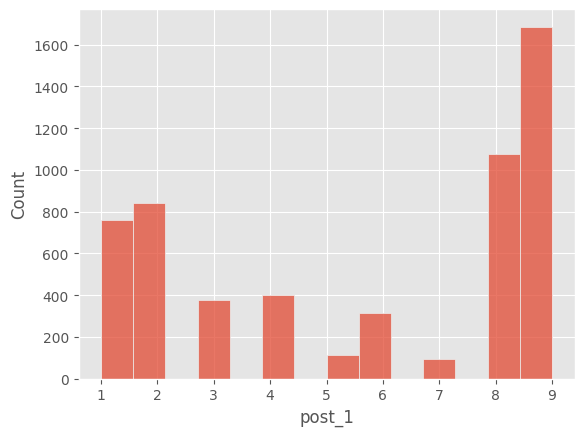

In [81]:
sns.histplot(df, x= 'post_1')

[(0.0, 900000.0)]

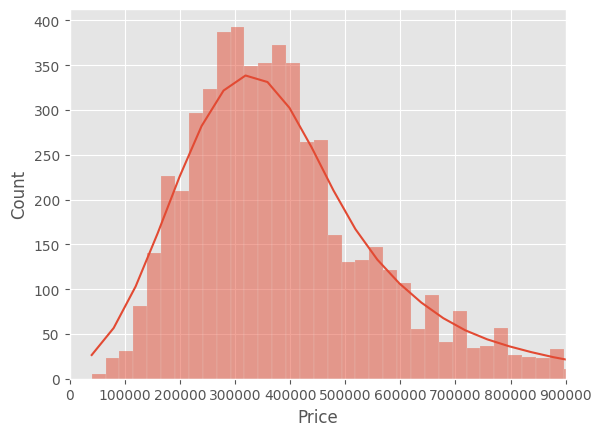

In [82]:
plotx= sns.histplot(df, x= 'Price', kde=True)
plotx.set(xlim=(0, 900000))

[(0.0, 800000.0)]

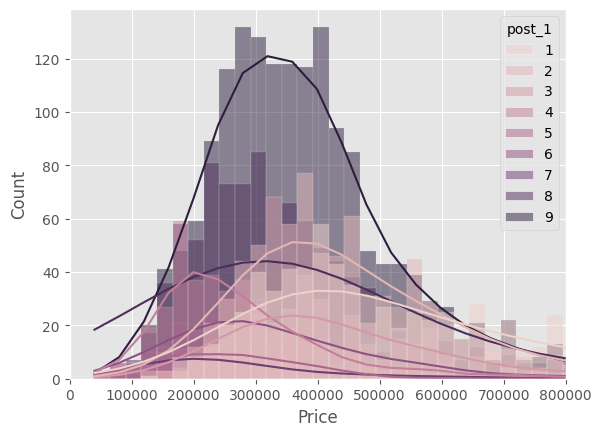

In [83]:
plotx= sns.histplot(df, x= 'Price', kde=True, hue = "post_1")
plotx.set(xlim=(0, 800000))

[(0.0, 800000.0)]

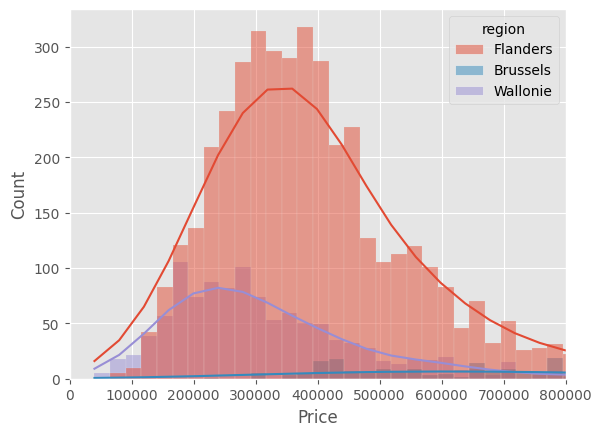

In [84]:
plotx= sns.histplot(df, x= 'Price', kde=True, hue = "region")
plotx.set(xlim=(0, 800000))

In [85]:
# Group by Postal_code and region with mean and count aggregation
# df2=df.query("Courses == 'Spark'")
agg = 



SyntaxError: invalid syntax (1566882848.py, line 3)

In [ ]:

# Group by region and postal code, then calculate the average price
avg_price_per_postal_code = df.groupby(['region', 'Postal_code'])['Price'].mean().reset_index()

# Find the postal code with the highest average price per region
max_avg_price_per_region = avg_price_per_postal_code.loc[
    avg_price_per_postal_code.groupby('region')['Price'].idxmax()
]

# Display the result
print(max_avg_price_per_region)



In [35]:
# Step 1: Filter postal codes with at least 5 records
postal_code_counts = avg_price_per_postal_code['Postal_code'].value_counts()
valid_postal_codes = postal_code_counts[postal_code_counts >= 5].index

filtered_data = avg_price_per_postal_code[avg_price_per_postal_code['Postal_code'].isin(valid_postal_codes)]

# Step 2: Get max avg price per region
max_avg_price_per_region = filtered_data.loc[
    filtered_data.groupby('region')['Price'].idxmax()
]

print(max_avg_price_per_region)

Empty DataFrame
Columns: [region, Postal_code, Price]
Index: []


In [23]:
# Group by region and postal code, then calculate the median price
median_price_per_postal_code = df.groupby(['region', 'Postal_code'])['Price'].median().reset_index()

# Find the postal code with the highest median price per region
max_median_price_per_region = median_price_per_postal_code.loc[
    median_price_per_postal_code.groupby('region')['Price'].idxmax()
]

# Display the result
print(max_median_price_per_region)

       region Postal_code     Price
13   Brussels        1150  700000.0
416  Flanders        9667  775000.0
580  Wallonie        5031  749000.0


In [68]:
df_filtered = df[df['Postal_code'] == '1000']
df_filtered.head()

,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,epc,price_per_sqm,post_1,post_2,region
1062,20234969,Bruxelles,1000,479000,House,5,220,Rue Du Houblon,52,50.851363,4.340258,0,0,0,0,0,Semi equipped,2,To be done up,0,F,2177.272727,1,10,Wallonie
1547,20245879,Bruxelles,1000,675000,House,6,365,Rue Des Fabriques,15,50.848628,4.341896,0,0,1,17,0,NaN,2,To renovate,0,G,1849.315068,1,10,Wallonie
2350,20186118,Brussels,1000,475000,House,2,165,Rue De La Bougie,37,50.847423,4.334863,0,0,0,0,0,Installed,2,Good,0,F,2878.787879,1,10,Wallonie
2821,20175696,Bruxelles,1000,550000,House,6,248,Rue Jenneval,33,50.848379,4.387859,0,0,1,0,53,Not installed,2,To renovate,0,G,2217.741935,1,10,Wallonie


In [25]:
# Group by region and postal code, then calculate the average price per sqm
avg_price_per_sqm_per_postal_code = df.groupby(['region', 'Postal_code'])['price_per_sqm'].mean().reset_index()

# Find the postal code with the highest average price per region
max_avg_price_per_sqm_per_region = avg_price_per_sqm_per_postal_code.loc[
    avg_price_per_sqm_per_postal_code.groupby('region')['price_per_sqm'].idxmax()
]

# Display the result
print(max_avg_price_per_sqm_per_region)

       region Postal_code  price_per_sqm
13   Brussels        1150    3442.853107
69   Flanders        1950    3472.942393
459  Wallonie        1325    3323.181388


In [26]:
# Group by region and calculate the average house price
avg_price_per_region = df.groupby('region')['Price'].mean().reset_index()

# Optional: Format the price values for readability
avg_price_per_region['Price'] = avg_price_per_region['Price'].map('{:,.2f}'.format)

# Display the result
print(avg_price_per_region)

## 


     region       Price
0  Brussels  557,816.13
1  Flanders  395,159.62
2  Wallonie  316,992.65


https://postcode.nationaal.be/

https://www.notaris.be/vastgoedprijzen

tgoedprijzen

In [27]:
# Group by region and calculate the average house price
avg_price_per_sqm_per_region = df.groupby('region')['price_per_sqm'].mean().reset_index()

# Optional: Format the price values for readability
avg_price_per_sqm_per_region['price_per_sqm'] = avg_price_per_sqm_per_region['price_per_sqm'].map('{:,.2f}'.format)

# Display the result
print(avg_price_per_sqm_per_region)

     region price_per_sqm
0  Brussels      2,815.55
1  Flanders      2,175.19
2  Wallonie      1,943.33
